# INM701 Coursework
## Imtiaz Ali 200022830

The goal is to use regression to predict if a UFC fighter wins more often based on features such height to weight ratio, Significant strikes landed and absorbed, takedowns attempted and defended and also submission attempts.

4100+ records, with 18 features.


### Printing the Dataset

In [35]:
import os
import pandas as pd
import numpy as np

path = "."
filename_read = ("ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,sig_strikes_landed_min,sig_strike_acc,sig_strikes_absorbed_min,sig_strike_def,avg_takedowns_landed_per_15_min,takedown_acc,takedown_def,avg_sub_attempted_15_min
0,Tom Tuggle,The Law,0,3,0,187.96,113.40,NaN,Orthodox,NaN,0.00,0,2.14,0,32.14,100,0,0.00
1,Theo Rlayang,Jungle King,5,1,0,170.18,65.77,165.10,Orthodox,10/08/1994,5.93,48,8.40,40,2.00,40,0,5.93
2,Frank Shamrock,NaN,23,10,2,177.80,83.91,NaN,Orthodox,08/12/1972,4.75,53,4.66,57,0.35,50,37,4.75
3,Jason Brilz,Hitman,22,6,1,180.34,92.99,180.34,Orthodox,07/07/1975,2.66,40,1.78,65,2.37,25,25,2.66
4,Glaico Franca Moreira,Nego,15,5,0,182.88,70.31,195.58,Orthodox,28/02/1991,2.35,42,3.46,47,2.68,42,76,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,Waldo Cortes-Acosta,Salsa Boy,10,1,0,193.04,117.93,198.12,Orthodox,03/10/1991,6.97,50,4.06,52,0.00,0,60,6.97
4105,Brandon Sayles,Man of War,5,1,0,195.58,120.20,NaN,NaN,NaN,0.00,0,0.00,0,0.00,0,0,0.00
4106,Elizabeth Phillips,NaN,6,6,0,167.64,61.23,165.10,Orthodox,20/08/1986,2.60,33,3.07,58,0.75,25,53,2.60
4107,Dave Galera,Scarecrow,5,1,0,180.34,61.23,NaN,Orthodox,12/01/1978,1.67,69,0.53,33,0.00,0,14,1.67


### Drop dataset columns and fill in blank values.

In [13]:
import os
import pandas as pd
import numpy as np

path = "."

filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Get a list of all numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns

# Apply median imputation to all numeric columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))

# Calculate the current ratio of the three string values in the column
value_counts = df['stance'].value_counts(normalize=True)

# Fill empty cells with the values based on the current ratio
df['stance'] = df['stance'].fillna(pd.Series(np.random.choice(value_counts.index, p=value_counts.values, size=len(df))))

columns_to_drop = ['name', 'nickname','date_of_birth']

# Drop columns if they exist
for column_to_drop in columns_to_drop:
    if column_to_drop in df.columns:
        df.drop(column_to_drop, axis=1, inplace=True)
    else:
        print(f"Column '{column_to_drop}' not found in DataFrame.")

df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2) 
df['wld_ratio'] = df['wins'] / (df['losses'] + df['draws']).replace(0, 1)  # Avoid division by zero
df.to_csv("C:/Users/imtia/Desktop/INM701/newufc.csv", index=False)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df


,wins,losses,draws,height_cm,weight_kg,reach_in_cm,stance,sig_strikes_landed_min,sig_strike_acc,sig_strikes_absorbed_min,sig_strike_def,avg_takedowns_landed_15_min,takedown_acc,takedown_def,avg_sub_attempt_15_min,bmi,wld_ratio
0,3,1,0,193.04,83.91,182.88,Orthodox,0.91,42,2.27,28,0.00,0,0,0.91,22.517445,3.000000
1,2,2,0,193.04,102.06,182.88,Southpaw,1.03,33,4.91,38,0.00,0,25,1.03,27.388040,1.000000
2,10,4,0,190.50,92.99,195.58,Orthodox,3.12,42,4.25,52,3.00,48,66,3.12,25.623962,2.500000
3,14,4,1,177.80,65.77,177.80,Orthodox,4.74,53,4.91,54,0.29,20,50,4.74,20.804838,2.800000
4,2,3,0,187.96,92.99,182.88,Orthodox,1.09,50,9.27,19,0.00,0,100,1.09,26.321181,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,13,5,0,187.96,92.99,182.88,Orthodox,3.27,39,3.14,60,0.65,14,57,3.27,26.321181,2.600000
4105,1,3,0,177.80,52.16,182.88,Orthodox,0.00,0,0.00,0,0.00,0,0,0.00,16.499625,0.333333
4106,10,6,0,182.88,92.99,187.96,Southpaw,2.50,42,2.41,60,2.46,32,57,2.50,27.803779,1.666667
4107,31,18,1,180.34,70.31,182.88,Switch,2.03,47,4.07,35,0.43,9,57,2.03,21.618869,1.631579


### Weight categories count

In [53]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "."
filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Define UFC weight categories
weight_categories = {
    'Strawweight': (0, 52.5),
    'Flyweight': (52.5, 56.7),
    'Bantamweight': (56.7, 61.3),
    'Featherweight': (61.3, 65.8),
    'Lightweight': (65.8, 70.3),
    'Welterweight': (70.3, 77.1),
    'Middleweight': (77.1, 83.9),
    'Light Heavyweight': (83.9, 102.1),
    'Heavyweight': (102.1, 120.2),
    'Super Heavyweight': (120.2, float('inf'))
}

# Categorize weights based on UFC weight categories
df['weight_category'] = pd.cut(df['weight_kg'], bins=[-float('inf')] + [upper for (_, upper) in weight_categories.values()],
                                labels=weight_categories.keys())

# Get the count of fighters, wins, losses, and draws in each weight category
fighters_by_weight_category = df.groupby('weight_category').agg({
    'wins': 'sum',
    'losses': 'sum',
    'draws': 'sum',
    'weight_kg': 'count'  # Total fighters
}).reset_index()

# Rename the columns
fighters_by_weight_category.columns = ['weight_category', 'total_wins', 'total_losses', 'total_draws', 'total_fighters']

# Print the result
print(fighters_by_weight_category[['weight_category', 'total_wins', 'total_losses', 'total_draws', 'total_fighters']])


     weight_category  total_wins  total_losses  total_draws  total_fighters
0        Strawweight        1173           532            9             125
1          Flyweight        3226          1249           47             290
2       Bantamweight        5454          2295          105             451
3      Featherweight        6230          2605          139             465
4        Lightweight         373           189           26              25
5       Welterweight        8590          3839          200             649
6       Middleweight        8626          3990          203             632
7  Light Heavyweight       12204          6300          278            1002
8        Heavyweight        4440          2013           65             337
9  Super Heavyweight         253           263           11              46


C:\Users\imtia\AppData\Local\Temp\ipykernel_23548\2629017215.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fighters_by_weight_category = df.groupby('weight_category').agg({


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import os
import pandas as pd
import numpy as np

path = "."

filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Gets list of all numeric columns in the data set
numeric_columns = df.select_dtypes(include=['number']).columns
# Apply median to all numeric columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))

# Calculate the current ratio of the strings in the column
value_counts = df['stance'].value_counts(normalize=True)
# Fills the missing values with the values based on the current ratio
df['stance'] = df['stance'].fillna(pd.Series(np.random.choice(value_counts.index, p=value_counts.values, size=len(df))))

columns_to_drop = ['name', 'nickname','stance','date_of_birth']

# Drop columns if they exist
for column_to_drop in columns_to_drop:
    if column_to_drop in df.columns:
        df.drop(column_to_drop, axis=1, inplace=True)
    else:
        print(f"Column '{column_to_drop}' not found in DataFrame.")
df.to_csv("C:/Users/imtia/Desktop/INM701/newufc.csv", index=False)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df
print(df[:5])

# Assuming 'label_column' is the name of the column containing your target variable (labels)
X = df.drop('wins', axis=1)  # Features
y = df['wins']  # Labels

# Print some information about the data before splitting
print(f"Original data shape: {X.shape}, {y.shape}")

# Perform the training testing validation splits
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the set shapes to verify the splits
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Print some information about the data after splitting and scaling
print(f"Scaled X_train shape: {X_train_scaled.shape}, Scaled X_val shape: {X_val_scaled.shape}")

# Define hyperparameter grid
nn_param_grid = {
    'hidden_layer_sizes': [(50, 20)],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create a grid search for the best hyperparameters
#nn_grid_search = GridSearchCV(MLPRegressor(random_state=42, max_iter=2000), param_grid=nn_param_grid, cv=5, scoring='neg_mean_squared_error')
#nn_grid_search.fit(X_train_scaled, y_train)

# Get the best model
#best_nn_model = nn_grid_search.best_estimator_

# Predict on the validation set
#y_pred_val = best_nn_model.predict(X_val_scaled)

# Evaluate the model on the validation set
#mse_val = mean_squared_error(y_val, y_pred_val)
#print(f"Mean Squared Error (Neural Network): {mse_val}")

   wins  losses  draws  height_cm  weight_kg  reach_in_cm  \
0    13       7      0     190.50      70.31       195.58   
1    16       5      0     167.64      52.16       165.10   
2     8       0      0     167.64      56.70       172.72   
3    22       9      0     177.80      65.77       177.80   
4     6       2      0     175.26      70.31       182.88   

   sig_strikes_landed_min  sig_strike_acc  sig_strikes_absorbed_min  \
0                    5.82              48                      4.61   
1                    6.28              48                      3.25   
2                    2.91              63                      1.64   
3                    4.36              41                      4.45   
4                    0.00               0                      0.00   

   sig_strike_def  avg_takedowns_landed_15_min  takedown_acc  takedown_def  \
0              41                         0.91            55            75   
1              62                         0.27    

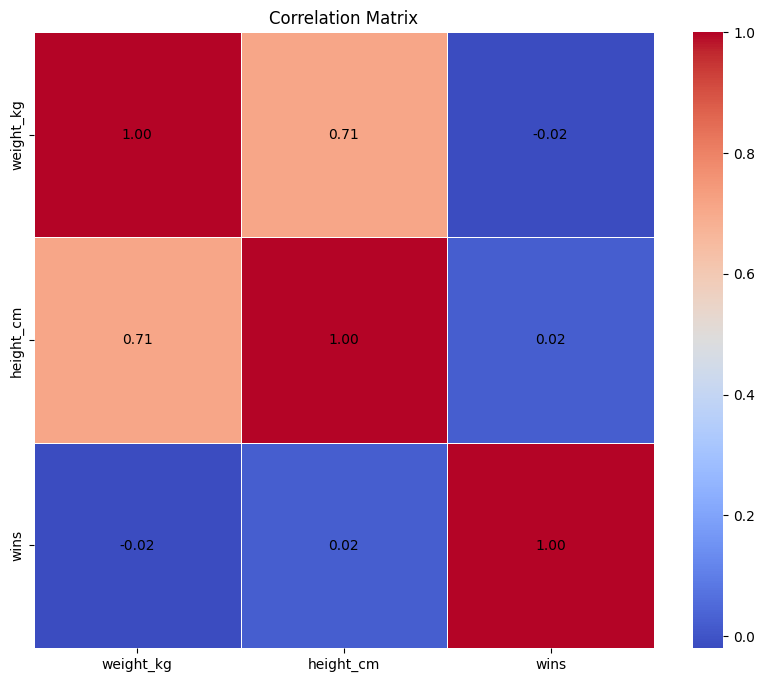

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from datetime import datetime

path = "."

filename_read = os.path.join(path, "newufc.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Calculate strike and takedown ratio
df['strikeratio'] = df['sig_strikes_landed_min'] / df['sig_strike_def']
df['tdratio'] = df['avg_takedowns_landed_15_min'] / df['takedown_def']

#correlation matrix
corr_matrix = df[['weight_kg', 'height_cm','wins']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')

# adding all correlations to the squares
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', fontsize=10)

plt.show()

expected positive correlation between height reach and strike ratio, and weight and td ratio, but they are negatively correlated, or almost no correlation.

X_train shape: (2465, 13), y_train shape: (2465,)
X_val shape: (822, 13), y_val shape: (822,)
X_test shape: (822, 13), y_test shape: (822,)


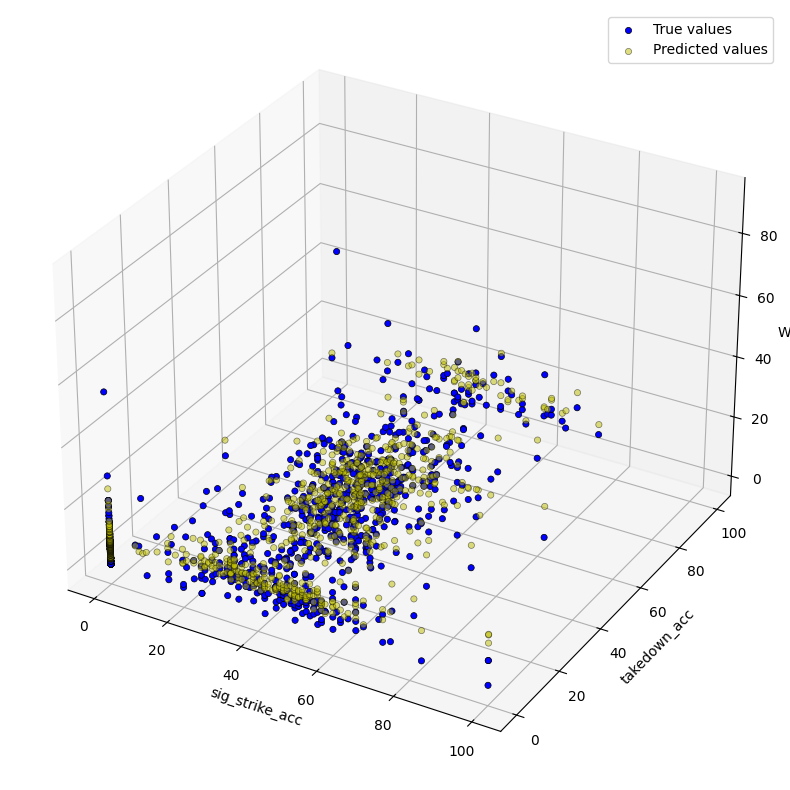

In [8]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your dataset
path = "."
filename_read = os.path.join(path, "newufc.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Get a list of all numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns

# Apply median imputation to all numeric columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))


# Assuming 'wins' is your target variable
result = [col for col in df.columns if col != 'wins']

# Convert relevant columns to numeric
df[result] = df[result].apply(pd.to_numeric, errors='coerce')

X = df[result].values
y = df['wins'].values

# Perform the split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets to verify the split
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Train a k-NN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=10)
knn_regressor.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = knn_regressor.predict(X_val)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_val[:, 6], X_val[:, 10], y_val, color='b', label='True values', alpha=1, edgecolors='k', linewidth=0.5)
ax.scatter(X_val[:, 6], X_val[:, 10], y_pred, color='y', label='Predicted values', alpha=0.5, edgecolors='k', linewidth=0.5)

ax.set_xlabel(result[6])
ax.set_ylabel(result[10])
ax.set_zlabel('Wins')

plt.legend()
plt.show()

Cross-validated Mean MSE: 61.17774620695112
Cross-validated MSE Standard Deviation: 38.196465566163894


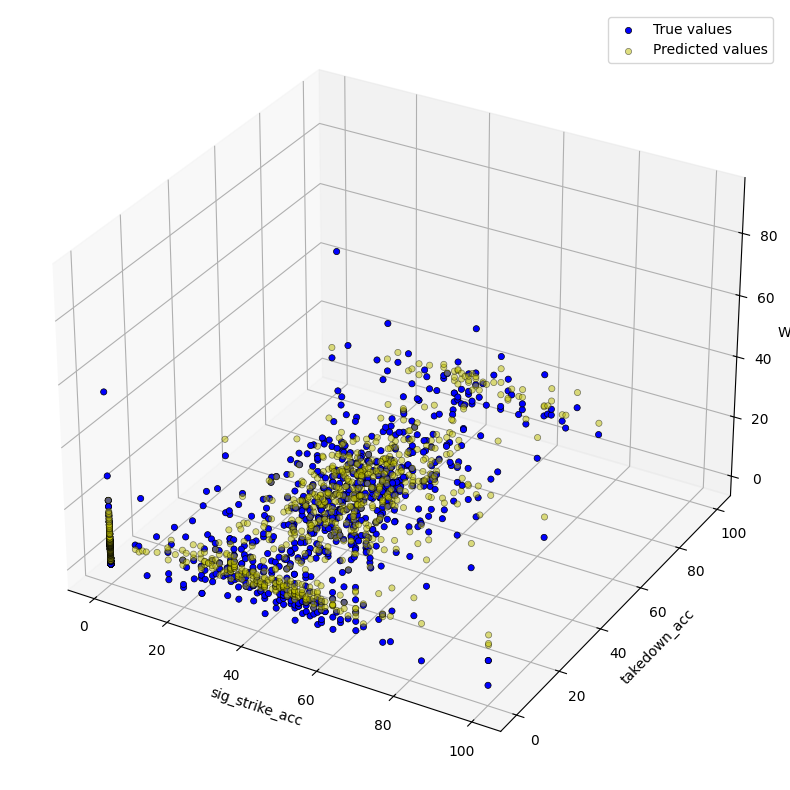

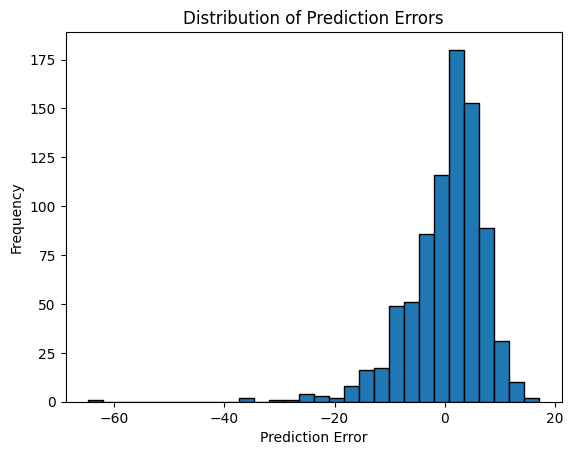

MSE for Your Model: 51.34011354420114
MSE for Baseline Model: 75.1485073210083
Your model has a lower MSE, indicating better performance.


In [39]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

# Load your dataset
path = "."
filename_read = os.path.join(path, "newufc.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Get a list of all numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns

# Apply median imputation to all numeric columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))

# Assuming 'wins' is your target variable
result = [col for col in df.columns if col != 'wins']

# Convert relevant columns to numeric
df[result] = df[result].apply(pd.to_numeric, errors='coerce')

X = df[result].values
y = df['wins'].values

# Train a k-NN regressor
k_neighbors = 15
knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors)

# Choose the number of folds (k)
num_folds = 10  # You can adjust this based on your preference

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_results = cross_val_score(knn_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative mean squared errors to positive
cv_results = -cv_results

# Print the results
print(f'Cross-validated Mean MSE: {np.mean(cv_results)}')
print(f'Cross-validated MSE Standard Deviation: {np.std(cv_results)}')

# Split the data for visualization
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets to verify the split
#print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
#print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
#print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Train a k-NN regressor on the training set
knn_regressor.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = knn_regressor.predict(X_val)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_val[:, 6], X_val[:, 10], y_val, color='b', label='True values', alpha=1, edgecolors='k', linewidth=0.5)
ax.scatter(X_val[:, 6], X_val[:, 10], y_pred, color='y', label='Predicted values', alpha=0.5, edgecolors='k', linewidth=0.5)

ax.set_xlabel(result[6])
ax.set_ylabel(result[10])
ax.set_zlabel('Wins')

plt.legend()
plt.show()


y_pred = knn_regressor.predict(X_val)
errors = y_pred - y_val

plt.hist(errors, bins=30, edgecolor='black')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

y_pred = knn_regressor.predict(X_val)

# Calculate MSE for your model
mse_model = mean_squared_error(y_val, y_pred)

# Create a baseline model predicting the mean
mean_wins = y_train.mean()
y_baseline = [mean_wins] * len(y_val)

# Calculate MSE for the baseline model
mse_baseline = mean_squared_error(y_val, y_baseline)

print(f'MSE for Your Model: {mse_model}')
print(f'MSE for Baseline Model: {mse_baseline}')

# Compare the MSE values
if mse_model < mse_baseline:
    print('Your model has a lower MSE, indicating better performance.')
else:
    print('The baseline model has a lower MSE, suggesting limited improvement by your model.')
